In [1]:
# Import Library
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

2023-12-04 09:23:13.366109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
path_major = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Major/'
path_minor = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Minor/'

major_file = tf.data.Dataset.list_files(path_major + '*.wav')
minor_file = tf.data.Dataset.list_files(path_minor + '*.wav')

Major = tf.data.Dataset.zip((major_file, tf.data.Dataset.from_tensor_slices(tf.ones(len(major_file)))))
Minor = tf.data.Dataset.zip((minor_file, tf.data.Dataset.from_tensor_slices(tf.zeros(len(minor_file)))))

#data = Major.concatenate(Minor)

In [56]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

def preprocess(file_path, label):
    # Load audio file
    wav = load_wav_16k_mono(file_path)

    # Fix the length to 48000
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    
    return spectrogram, label, wav

def save_spectrogram_plot(spectrogram, filename):
    # Create a figure with no axes
    
    plt.figure(figsize = (40,30))
    plt.imshow(tf.transpose(spectrogram)[0], cmap='jet')
    plt.axis('off')  # Hide the axes

    # Save the figure without padding and axes
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
save_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map/Major_jet/'

cnt = 0

for file_path, label in Major:
    cnt += 1
    
    spectrogram, label, _ = preprocess(file_path, label)

    filename = f"{save_path}Major{cnt}.png"

    save_spectrogram_plot(spectrogram, filename)

save_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map/Minor_jet/'

cnt = 0

for file_path, label in Minor:
    cnt += 1
    
    spectrogram, label, _ = preprocess(file_path, label)

    filename = f"{save_path}Minor{cnt}.png"

    save_spectrogram_plot(spectrogram, filename)

In [58]:
filepath, label = Major.shuffle(buffer_size=10000).as_numpy_iterator().next()

spectrogram, _ , _ = preprocess(filepath, label)

(0.0, 33.82876968383789)


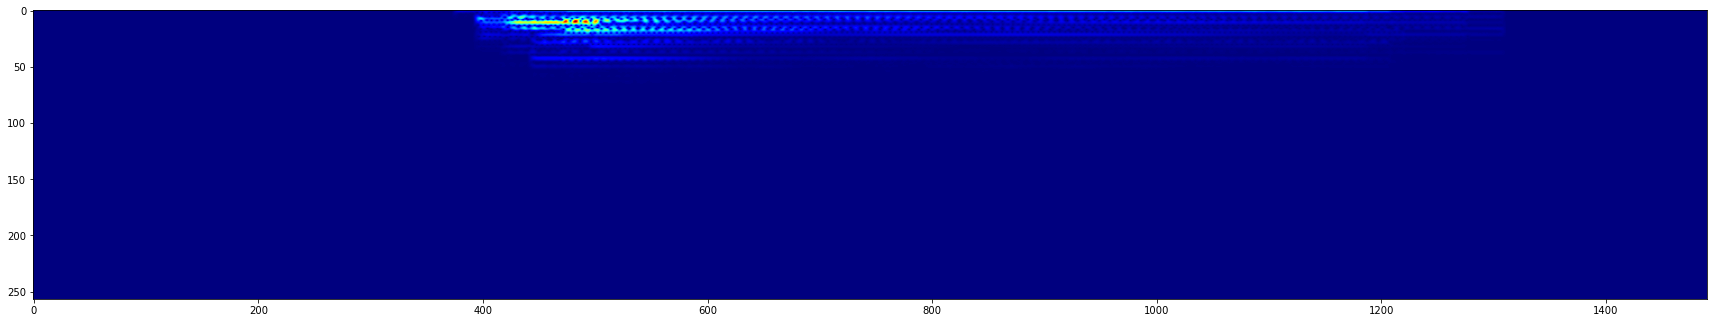

In [59]:
plt.figure(figsize=(30,20))
c = plt.imshow(tf.transpose(spectrogram)[0], cmap='jet')
print(c.get_clim())
plt.show()

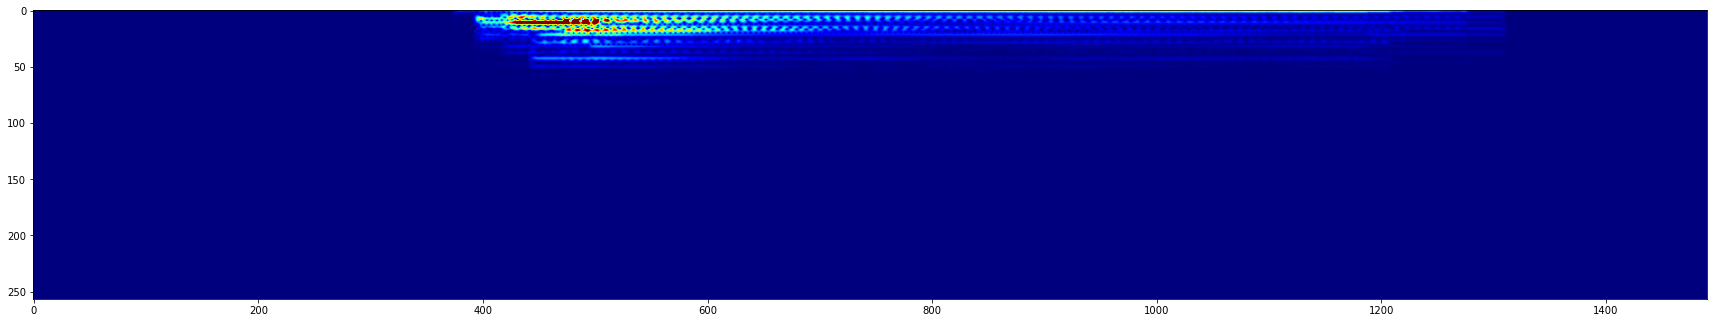

In [60]:
plt.figure(figsize=(30,20))
c = plt.imshow(tf.transpose(spectrogram)[0], cmap='jet')
tmp = c.get_clim()
c.set_clim(0, tmp[1]/2)
plt.show()